Project 3 - The framework for training a CNN using PyTorch on a COVID lung imaging dataset. 

Imports

In [25]:
from requests import get
import zipfile
import io
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import os
import torch
import torch.optim as optim
import torchvision
import torch.nn as nn
from torchvision import datasets, transforms
from torchvision.transforms.functional import to_pil_image
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.nn as nn
import torchvision.models as models


Access the Image URLs

In [26]:
path = Path("proj3_data/data_upload_v3")
if not path.exists():
  response = get("https://www.dropbox.com/scl/fi/ajy4i9u4bjt4ho3dz4l37/data_upload_v3.zip?rlkey=kyh5oz91vykk7cao6jiip4dyn&dl=1")
  print(response)
  path.parent.mkdir(parents=True, exist_ok=True)
  zip_file = zipfile.ZipFile(io.BytesIO(response.content))
  zip_file.extractall(path.parent)
  print("Data extracted succesfully")
else:
  print("Data already downloaded")

Data already downloaded


In [27]:
!ls proj3_data/data_upload_v3/test

covid non


In [28]:
path = Path("proj3_data/data_upload_v3")
non = []
covid = []

for file in path.rglob("*"):
  if file.is_file():
    if "non" in file.parts:
      non.append(file)
    if "covid" in file.parts:
      covid.append(file)

non[:10], covid[:10]


([PosixPath('proj3_data/data_upload_v3/test/non/Lung_Lesion/patient08653-study1-view1_frontal.jpg'),
  PosixPath('proj3_data/data_upload_v3/test/non/Lung_Lesion/patient06958-study2-view1_frontal.jpg'),
  PosixPath('proj3_data/data_upload_v3/test/non/Lung_Lesion/patient06757-study1-view1_frontal.jpg'),
  PosixPath('proj3_data/data_upload_v3/test/non/Lung_Lesion/patient06168-study3-view1_frontal.jpg'),
  PosixPath('proj3_data/data_upload_v3/test/non/Lung_Lesion/patient09442-study1-view1_frontal.jpg'),
  PosixPath('proj3_data/data_upload_v3/test/non/Lung_Lesion/patient10278-study1-view1_frontal.jpg'),
  PosixPath('proj3_data/data_upload_v3/test/non/Lung_Lesion/patient06044-study2-view1_frontal.jpg'),
  PosixPath('proj3_data/data_upload_v3/test/non/Lung_Lesion/patient05268-study1-view1_frontal.jpg'),
  PosixPath('proj3_data/data_upload_v3/test/non/Lung_Lesion/patient07741-study2-view1_frontal.jpg'),
  PosixPath('proj3_data/data_upload_v3/test/non/Lung_Lesion/patient01857-study1-view1_front

Print images

COVID Lung Images:


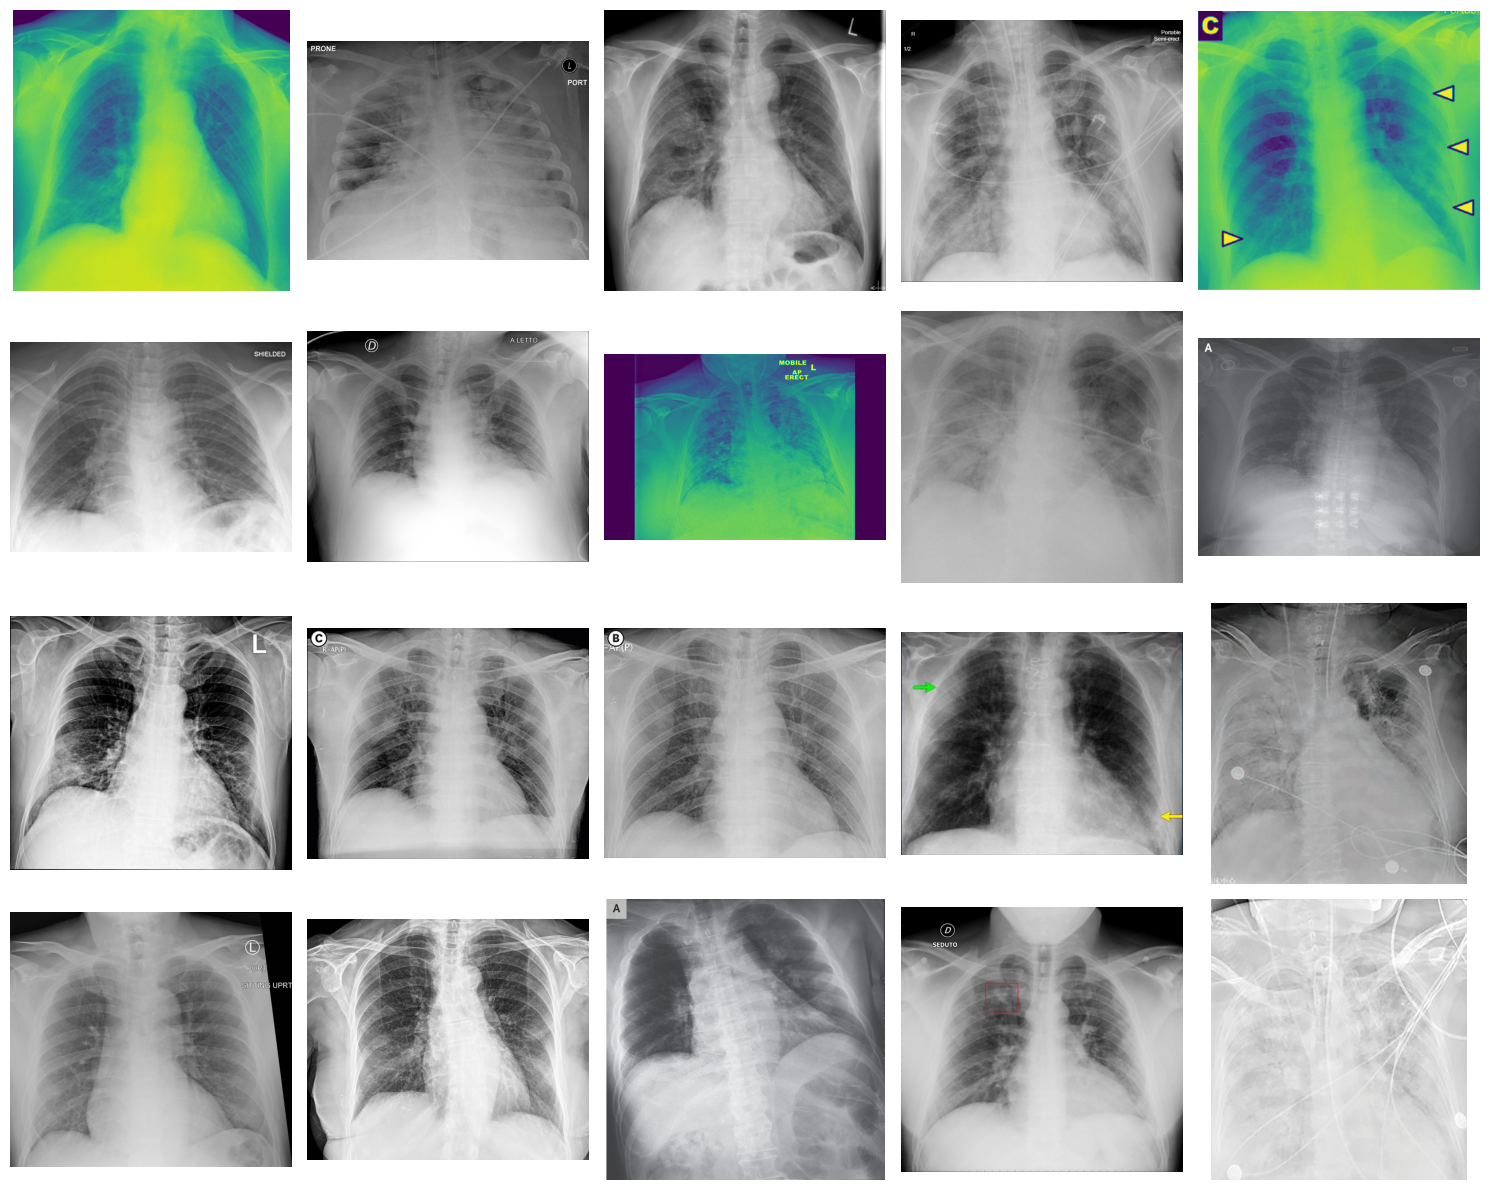

Non-COVID Lung Images:


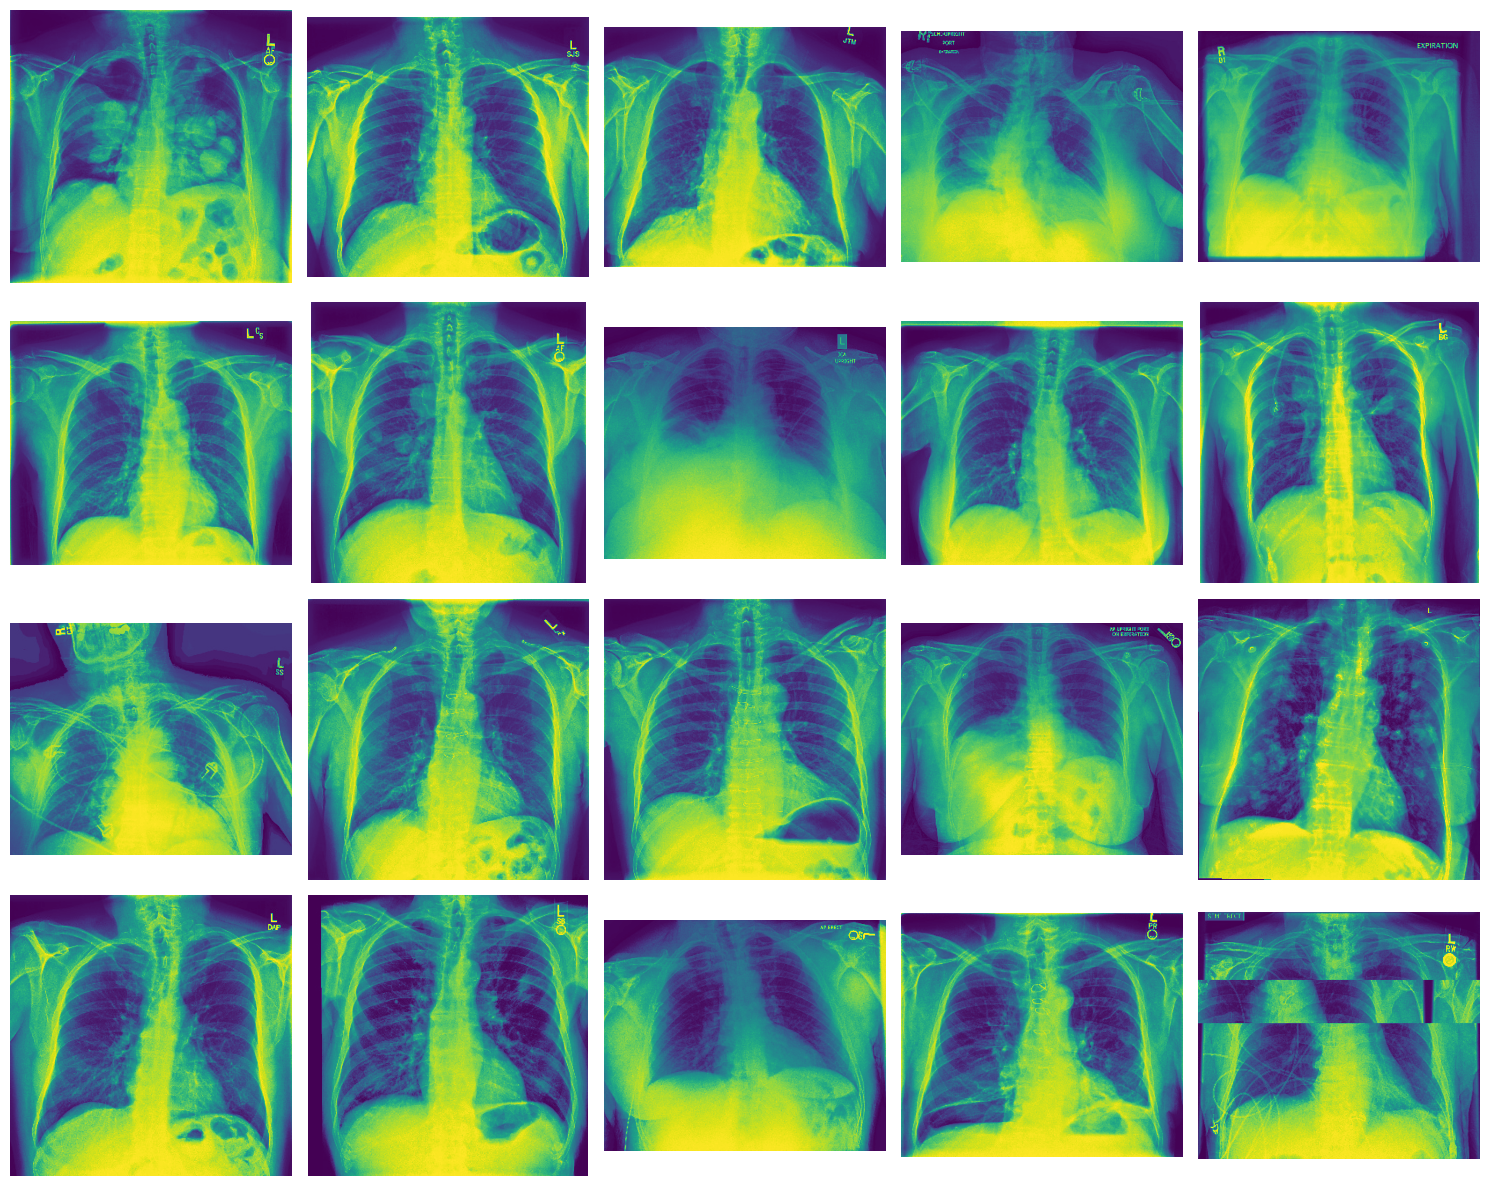

In [29]:
num_rows = 4
num_cols = 5
total_images = num_rows * num_cols

path = Path("proj3_data/data_upload_v3")

covid_collection = []
for file in path.rglob("*"):
    if file.is_file() and "covid" in file.parts:
        covid_collection.append(file)

print("COVID Lung Images:")
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))
for i, img_path in enumerate(covid_collection[:total_images]):
    row = i // num_cols
    col = i % num_cols
    img = plt.imread(img_path)
    axes[row, col].imshow(img)
    axes[row, col].axis('off')
plt.tight_layout()
plt.show()

non_covid_collection = []
for file in path.rglob("*"):
    if file.is_file() and "non" in file.parts:
        non_covid_collection.append(file)

print("Non-COVID Lung Images:")
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))
for i, img_path in enumerate(non_covid_collection[:total_images]):
    row = i // num_cols
    col = i % num_cols
    img = plt.imread(img_path)
    axes[row, col].imshow(img)
    axes[row, col].axis('off')
plt.tight_layout()
plt.show()


Data preprocessing - load, resize and normalize; data augmentation.

In [30]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_data = datasets.ImageFolder(root="proj3_data/data_upload_v3/train", transform=transform)
test_data = datasets.ImageFolder(root="proj3_data/data_upload_v3/test", transform=transform)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)


Print preprocessed images from the train and test datasets.


Preprocessed Train Images:


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

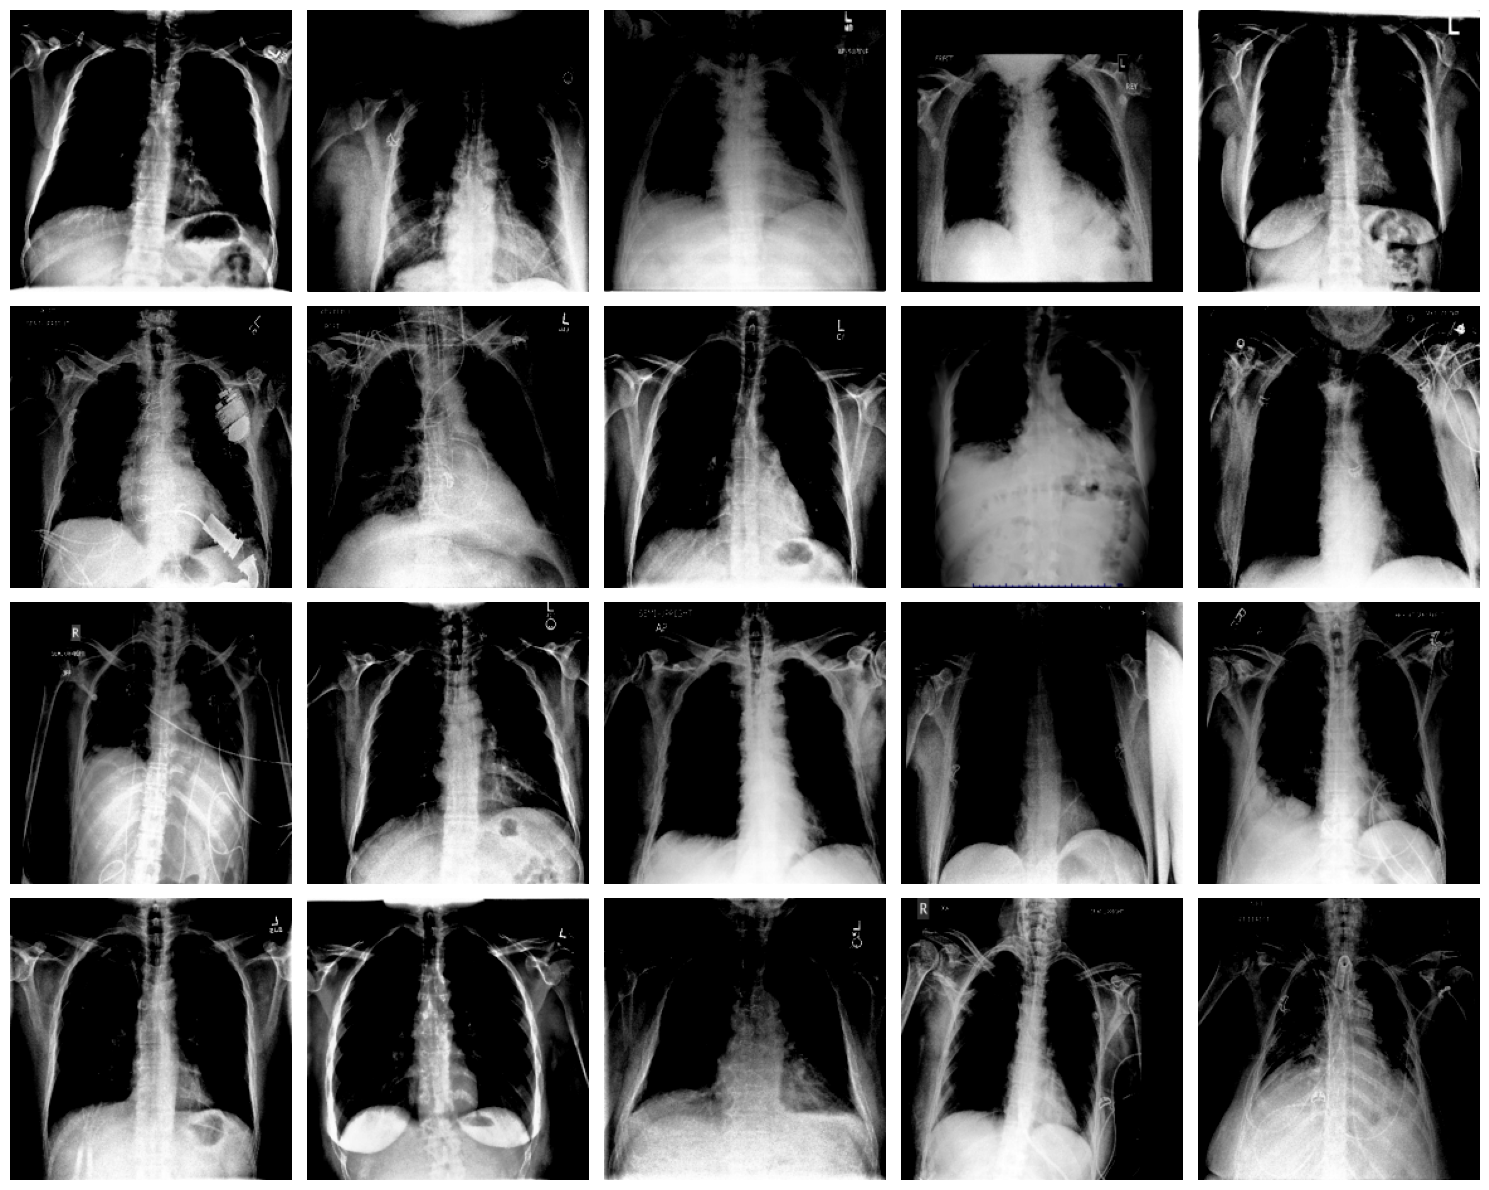

Preprocessed Test Images:


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

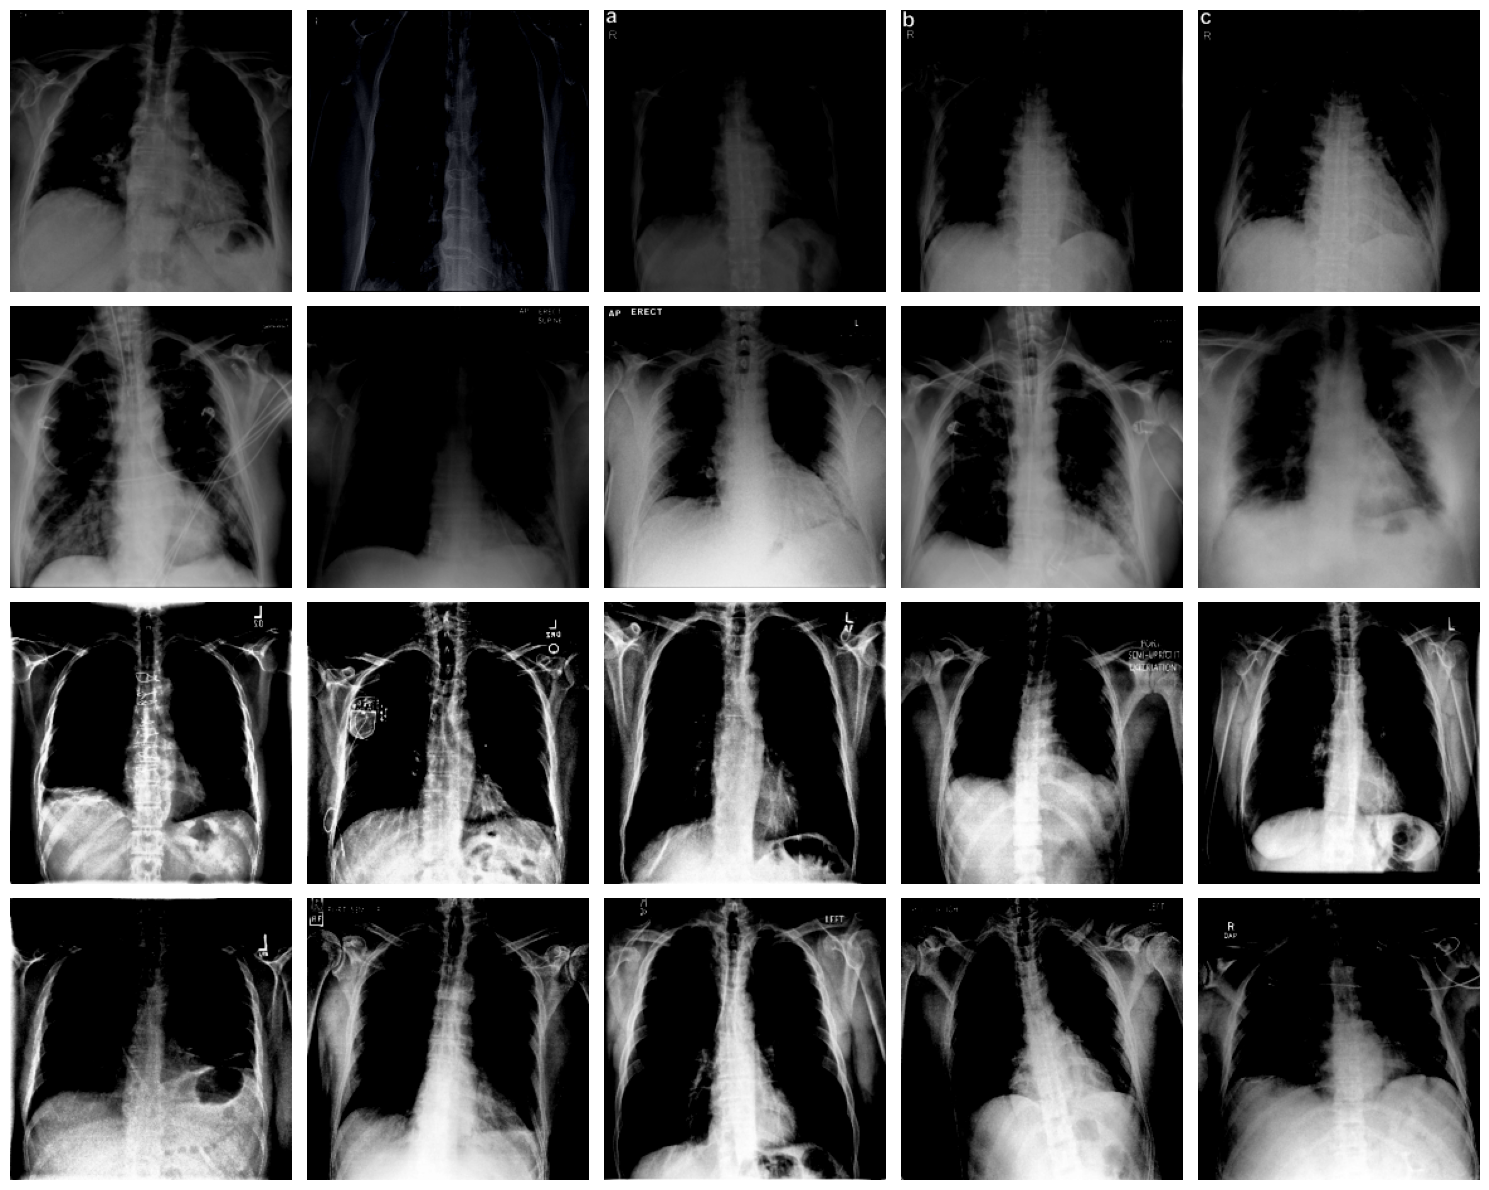

In [31]:
print("Preprocessed Train Images:")
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))
for i, (images, labels) in enumerate(train_loader):
    if i >= num_rows * num_cols:
        break
    for j, image in enumerate(images):
        if i * num_cols + j >= num_rows * num_cols:
            break
        row = (i * num_cols + j) // num_cols
        col = (i * num_cols + j) % num_cols
        img = image.permute(1, 2, 0).numpy()
        axes[row, col].imshow(img)
        axes[row, col].axis('off')
plt.tight_layout()
plt.show()

print("Preprocessed Test Images:")
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))
for i, (images, labels) in enumerate(test_loader):
    if i >= num_rows * num_cols:
        break
    for j, image in enumerate(images):
        if i * num_cols + j >= num_rows * num_cols:
            break
        row = (i * num_cols + j) // num_cols
        col = (i * num_cols + j) % num_cols
        img = image.permute(1, 2, 0).numpy()
        axes[row, col].imshow(img)
        axes[row, col].axis('off')
plt.tight_layout()
plt.show()

Model Selection. Choosing Convolutional Neural Network (CNN) architecture. Model instantiation, loss function, and optimizer.

In [32]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.fc1 = nn.Linear(32 * 56 * 56, 256)
        self.fc2 = nn.Linear(256, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 56 * 56)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


Model training on the training data. Starting with small amount of epochs.

In [33]:
for epoch in range(5):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Finished Training')

Finished Training


Model evaluation. Trained model evaluation on the test set to assess it's performance. Metrics such as accuracy, precision, recall, and F1-score calculation.

In [34]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the test images: 98 %


Using pre-trained models like VGG, ResNet or DenseNet... ResNet.

In [35]:
model = models.resnet18(pretrained=True)

num_classes = 2
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [36]:
num_epochs = 5

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch + 1}, Training Loss: {running_loss / len(train_loader)}")

model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f"Accuracy on test set: {(100 * correct / total):.2f}%")

Epoch 1, Training Loss: 0.09325614814279658
Epoch 2, Training Loss: 0.025078072142963665
Epoch 3, Training Loss: 0.01812760085731773
Epoch 4, Training Loss: 0.008670991385412035
Epoch 5, Training Loss: 0.007894469105381038
Accuracy on test set: 99.74%


Documentation. My findings, including insights gained, challenges faced, and lessons learned during the implementation process...

During the implementation process of classifying COVID and non-COVID lung images using a Convolutional Neural Network (CNN), I encountered various insights, challenges, and lessons learned. Working with images for the first time, I gained a deeper understanding of image preprocessing techniques such as resizing, normalization, and augmentation to enhance model performance and robustness. I also realized the importance of dataset balance and quality, as imbalanced or noisy data could adversely affect model training and accuracy. Challenges arose in selecting the appropriate CNN architecture and fine-tuning hyperparameters, as different architectures and parameter settings yielded varying results. Additionally, integrating transfer learning with pre-trained models like ResNet proved beneficial, but required careful adjustment of the final classification layer and learning rate. Despite these challenges, I learned the significance of model evaluation and interpretation, including metrics like accuracy and confusion matrices, to assess model effectiveness and diagnose potential issues. Overall, this project provided invaluable hands-on experience in image classification and deepened my understanding of neural networks in the context of imaging analysis.